# Author: Huzaib Mujeeb Mulla
## Let's Grow More - VIP Internship
## Task 1 - Iris Flowers Classification ML Project
##### Description --

**The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.**

**Dataset :** https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.manifold import TSNE

from warnings import filterwarnings
filterwarnings(action='ignore')

### Loading the Dataset

In [2]:
data = pd.read_csv("Iris.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


## Exploring Data 

### Reading Dataset

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Data Information

In [5]:
data.shape

(150, 6)

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [8]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Finding the Number of Clusters

In [9]:
actual_y=data['Species']

x=data.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


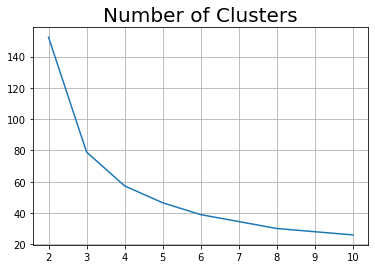

In [10]:
from sklearn.cluster import KMeans
#Here inertia means Sum of squared distances of samples to their closest cluster center.
number_of_clusters=[2,3,4,5,6,7,8,10]
inertia=[]
for i in number_of_clusters:
  kmeans=KMeans(n_clusters=i).fit(x)
  inertia.append(kmeans.inertia_)

plt.plot(number_of_clusters,inertia)
plt.title('Number of Clusters',size=20)
plt.grid()
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# add these predicted y's as column to our dataframe
x['predicted_y']=y_kmeans

In [12]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

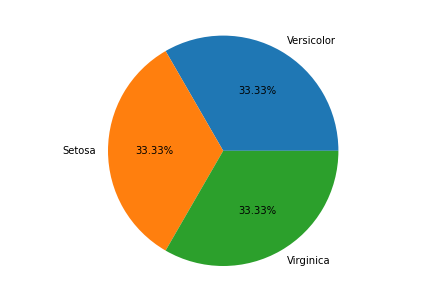

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

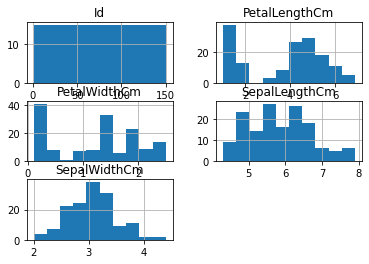

In [14]:
data.hist()
plt.show()

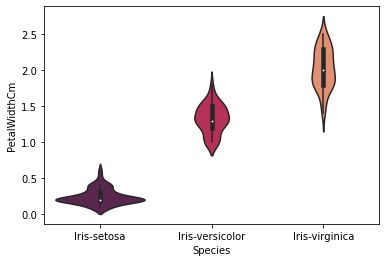

In [15]:
sns.violinplot(data=data,x="Species", y="PetalWidthCm",palette="rocket")

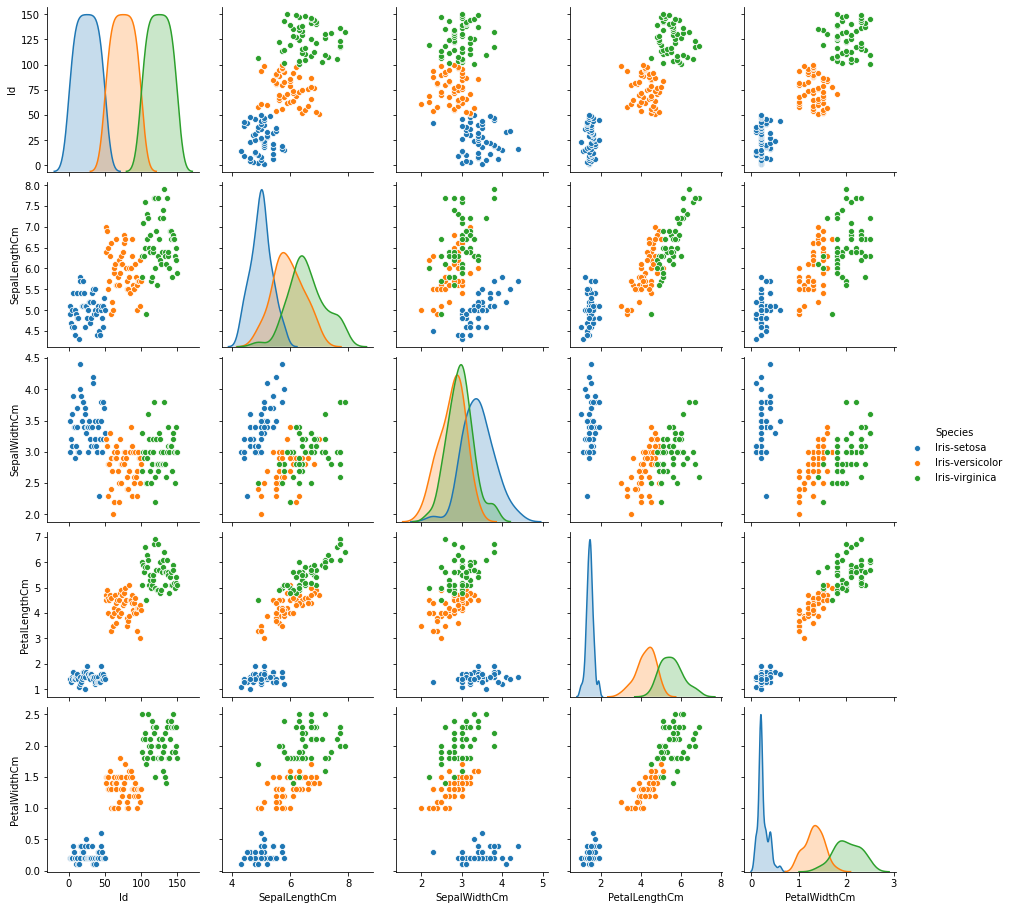

In [16]:
sns.pairplot(data,hue='Species')

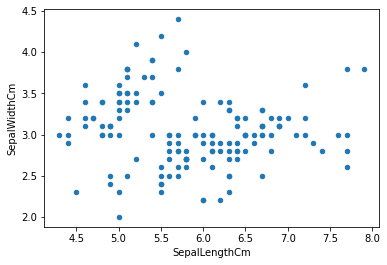

In [17]:
data.plot(kind="scatter", x="SepalLengthCm", y= "SepalWidthCm")

In [18]:
y_mapping={1:'Setosa',2:'versicolour',0:'virginica'}

x['predicted_y']=x['predicted_y'].map(y_mapping)

In [19]:
setosa = x.loc[x.predicted_y == 'Setosa',['SepalLengthCm','SepalWidthCm']]
virginica = x.loc[x.predicted_y == 'virginica',['SepalLengthCm','SepalWidthCm']]
versicolour = x.loc[x.predicted_y == 'versicolour',['SepalLengthCm','SepalWidthCm']]

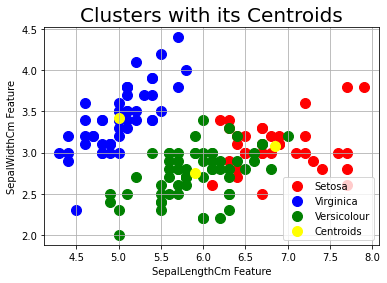

In [20]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], s = 100, c = 'red', label = 'Setosa')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], s = 100, c = 'blue', label = 'Virginica')
plt.scatter(versicolour['SepalLengthCm'], versicolour['SepalWidthCm'], s = 100, c = 'green', label = 'Versicolour')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.xlabel('SepalLengthCm Feature',size=10)
plt.ylabel('SepalWidthCm Feature',size=10)
plt.title('Clusters with its Centroids',size=20)
plt.grid()
plt.show()